In [22]:
import numpy as np
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta*(target-self.predict(xi))
                self.w_[1:]+=update*xi
                self.w_[0]+=update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
          return np.dot(X, self.w_[1:]+self.w_[0])
    def predict(self, X):
        return np.where(self.net_input(X) >=0.0, 1, -1)

In [23]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

In [24]:
class SLP:
  def __init__(self, eta=0.05, n_iter=10, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    n = y.shape[1]
    self.perceptrons =[]
    self.errors_ = np.zeros(n)
    for i in range(n):
      self.perceptrons.append(Perceptron(eta0=self.eta,max_iter=self.n_iter,random_state=self.random_state).fit(X, y[:,i]))
      #self.errors_ += self.perceptrons[i].errors_
    return self

  def predict(self, X):
    result = []
    for i in range(len(self.perceptrons)):
      result.append(self.perceptrons[i].predict(X))
    return result

  def predict_but_better(self, X):
    result = np.empty((X.shape[0],len(self.perceptrons)))
    for i in range(len(self.perceptrons)):
      result[:,i] = self.perceptrons[i].net_input(X)
    prediction = np.full_like(result, -1)#tworze maciez z minus 1
    for i in range(X.shape[0]):
      row_max = np.argmax(result[i,:])
      prediction[i,row_max] = 1
    return prediction

  def misclassified(self, X, y):
    couter = 0
    prediction = self.predict(X)
    for i in range(y.shape[0]):
      if np.any(prediction[i] != y[i,:]):
        couter+=1
    return couter
    
  def show(self, X):
    fig, _ = plt.subplots(2,5)
    ax = fig.axes
    for i in range(X.shape[0]):
      letter = X[i,:].reshape(7,5)
      ax[i].imshow(letter, cmap='gray')


In [25]:
import pandas as pd
alfabet = [ 1 , 4, 5, 8, 9, 10, 15, 16, 19, 25]
#alfabet =[10,11,12,13,14,15,16,17,18,19]
letters = pd.read_csv("letters.data.txt", header=None).to_numpy()
X = letters[:,0:35]
y = letters[:,35:]
X = X[alfabet,:]
y = y[alfabet,:][:,alfabet]

In [26]:
net = SLP().fit(X,y)

c:\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [27]:
#net.predict(X)

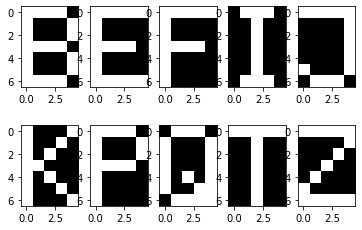

In [28]:
net.show(X)

In [29]:
net.predict(X)

[array([ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64),
 array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64),
 array([-1, -1,  1, -1, -1, -1, -1, -1, -1, -1], dtype=int64),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1], dtype=int64),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1], dtype=int64),
 array([-1, -1, -1, -1, -1,  1, -1, -1, -1, -1], dtype=int64),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64),
 array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1], dtype=int64),
 array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1], dtype=int64),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1], dtype=int64)]

In [30]:
net.errors_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
net.misclassified(X,y)

1

In [32]:
def damage(X,percent, seed=1): 
    rgen = np.random.RandomState(seed) 
    result = np.array( X ) 
    count = int( X.shape[1]* percent/100)

    for indeks_example in range(len(X) ): 
        order= np.sort( rgen.choice( X.shape[1], count, replace=False)) 
        for indeks_pixel in order: 
            result[indeks_example][indeks_pixel]*=-1

    return result

In [33]:
damage5 = damage(X,5)
damage15 = damage(X,15)
damage40 = damage(X,40)

In [34]:

net.predict(damage5)

[array([ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64),
 array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64),
 array([-1, -1, -1,  1, -1, -1, -1,  1, -1, -1], dtype=int64),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1], dtype=int64),
 array([-1, -1, -1, -1, -1,  1, -1, -1, -1, -1], dtype=int64),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64),
 array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1], dtype=int64),
 array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1], dtype=int64),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1], dtype=int64)]

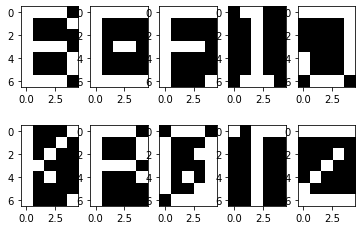

In [35]:
net.show(damage5)

In [36]:
net.misclassified(damage5,y)

3

In [37]:
net.predict(damage15)

[array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64),
 array([-1,  1, -1, -1, -1, -1, -1, -1, -1,  1], dtype=int64),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1], dtype=int64),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1], dtype=int64),
 array([-1, -1, -1,  1, -1,  1, -1, -1,  1, -1], dtype=int64),
 array([-1, -1, -1, -1, -1, -1,  1, -1, -1, -1], dtype=int64),
 array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1], dtype=int64),
 array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1], dtype=int64),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1], dtype=int64)]

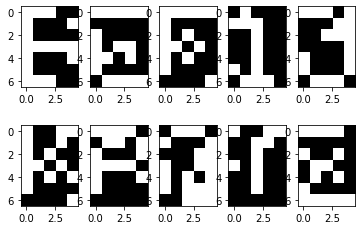

In [38]:
net.show(damage15)

In [39]:
net.misclassified(damage15,y)

4

In [40]:
net.predict(damage40)

[array([-1, -1, -1,  1,  1, -1, -1,  1, -1,  1], dtype=int64),
 array([-1, -1, -1, -1, -1,  1,  1, -1, -1,  1], dtype=int64),
 array([-1, -1, -1, -1, -1,  1,  1, -1, -1, -1], dtype=int64),
 array([-1, -1, -1,  1, -1, -1, -1,  1, -1,  1], dtype=int64),
 array([-1, -1, -1,  1,  1, -1, -1, -1, -1,  1], dtype=int64),
 array([-1, -1,  1,  1, -1, -1, -1,  1,  1,  1], dtype=int64),
 array([-1, -1, -1,  1, -1, -1, -1,  1, -1, -1], dtype=int64),
 array([-1, -1, -1,  1, -1, -1, -1,  1, -1,  1], dtype=int64),
 array([-1,  1, -1, -1,  1, -1,  1,  1,  1, -1], dtype=int64),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1,  1], dtype=int64)]

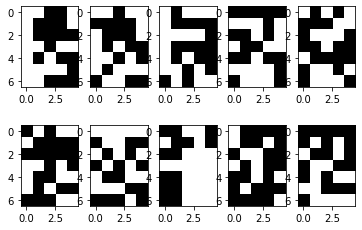

In [41]:
net.show(damage40)

In [42]:
net.misclassified(damage40,y)

10